In [27]:
import numpy as np
from scipy.stats import ttest_1samp
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import f_oneway

In [3]:
df = pd.read_excel('Mercury_Data.xlsx')

In [4]:
df.head()

,Unnamed: 0,Name,Hg,N,ELV,SA,Z,LT,ST,DA,RF,FR,DAM,LAT1,LAT2,LAT3,LONG1,LONG2,LONG3
0,0,ALLIGATOR.P,0.025,2,1494,47,26,2,0,1,0.69,0.8,1,45,37,50,69,12,30
1,1,ANASAGUNTICOOK.L,0.570,5,402,568,54,2,1,15,0.56,1.1,0,44,25,13,70,19,22
2,2,BALCH&STUMP.PONDS,0.770,5,557,704,44,2,1,14,0.58,2.7,0,43,37,0,70,59,4
3,3,BASKAHEGAN.L,0.790,5,417,6944,22,2,0,123,0.57,2.0,1,45,30,32,67,50,2
4,4,BAUNEAG.BEG.L,0.750,4,205,200,29,2,1,18,0.51,9.6,0,43,21,46,70,44,23


In [6]:
df = df.drop('Unnamed: 0', axis = 1)

In [7]:
df.head()

,Name,Hg,N,ELV,SA,Z,LT,ST,DA,RF,FR,DAM,LAT1,LAT2,LAT3,LONG1,LONG2,LONG3
0,ALLIGATOR.P,0.025,2,1494,47,26,2,0,1,0.69,0.8,1,45,37,50,69,12,30
1,ANASAGUNTICOOK.L,0.570,5,402,568,54,2,1,15,0.56,1.1,0,44,25,13,70,19,22
2,BALCH&STUMP.PONDS,0.770,5,557,704,44,2,1,14,0.58,2.7,0,43,37,0,70,59,4
3,BASKAHEGAN.L,0.790,5,417,6944,22,2,0,123,0.57,2.0,1,45,30,32,67,50,2
4,BAUNEAG.BEG.L,0.750,4,205,200,29,2,1,18,0.51,9.6,0,43,21,46,70,44,23


In [10]:
# mean mercury levels acros sall lakes
mercury_levels = df['Hg']

Hg_mean = df['Hg'].mean()
Hg_std_dev = mercury_levels.std()
Hg_max = mercury_levels.max()
Hg_min = mercury_levels.min()

In [11]:
print("Mean mercury levels: ", format(Hg_mean, ".2f"))
print("Standard Deviation of mercury levels: ", format(Hg_std_dev, ".2f"))
print("Maximum recorded case of mercury levels: ", format(Hg_max, ".2f"))
print("Minimum recorded case of mercury levels: ", format(Hg_min, ".2f"))

Mean mercury levels:  0.48
Standard Deviation of mercury levels:  0.34
Maximum recorded case of mercury levels:  2.50
Minimum recorded case of mercury levels:  0.03


Text(0, 0.5, 'Mercury Levels (ppm)')

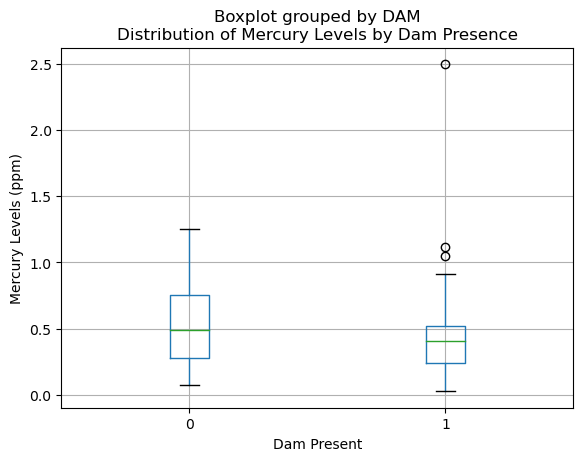

In [15]:
# Plot the distribution of mercury levels for lakes with and without a dam
fig, ax = plt.subplots()
df.boxplot(column = 'Hg', by = 'DAM', ax = ax)
ax.set_title('Distribution of Mercury Levels by Dam Presence')
ax.set_xlabel('Dam Present')
ax.set_ylabel('Mercury Levels (ppm)')

In [16]:
# Calculate the average mercury level for lakes with and without a dam
Hg_with_dam = df.loc[df['DAM'] == 1, 'Hg'].mean()
Hg_without_dam = df.loc[df['DAM'] == 0, 'Hg'].mean()

print("Mean Mercury levels in Lakes with a Dam: ", format(Hg_with_dam, ".2f"))
print("Mean Mercury levels in Lakes without Dams: ", format(Hg_without_dam, ".2f"))

Mean Mercury levels in Lakes with a Dam:  0.45
Mean Mercury levels in Lakes without Dams:  0.53


Text(0, 0.5, 'Mercury Levels (ppm)')

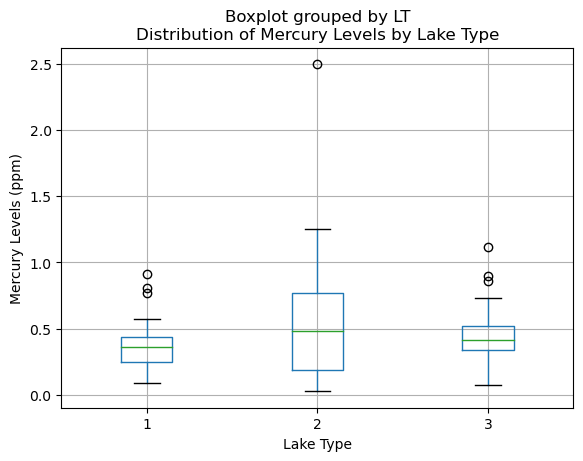

In [17]:
# Plot the distribution of mercury levels by lake type
fig, ax = plt.subplots()
df.boxplot(column='Hg', by='LT', ax=ax)
ax.set_title('Distribution of Mercury Levels by Lake Type')
ax.set_xlabel('Lake Type')
ax.set_ylabel('Mercury Levels (ppm)')

#### Statistical Analysis ####

In [24]:
#  Hypothesis test to determine if Hg levels are high


# Extract the mercury levels from the data
Hg_levels = df['Hg']
# Set the threshold of concern
threshold = 0.43

# Calculate the sample mean and standard deviation
mean = np.mean(Hg_levels)
stddev = np.std(Hg_levels)

# Perform the one-sample t-test
t_statistic, p_value = ttest_1samp(mercury_levels, threshold)

# Check if the p-value is less than the significance level (e.g., 0.05)

print("P-value: ", format(p_value, ".2f"))

if p_value < 0.05:
    print("Mercury levels in Maine lakes are significantly higher than the threshold of concern.")
else:
    print("Mercury levels in Maine lakes are not significantly higher than the threshold of concern.")

P-value:  0.13
Mercury levels in Maine lakes are not significantly higher than the threshold of concern.


In [21]:
p_value

0.12645452889560493

In [26]:
# Extract dam presence from the data

dam_presence = df['DAM']

# Fit a linear regression model
X = sm.add_constant(dam_presence)
model = sm.OLS(Hg_levels, X)
results = model.fit()

# Print the regression results
print(results.summary())

# Check if the dam presence coefficient is positive and statistically significant
# p-value = 0.66
if results.pvalues[1] < 0.05:
    print("There is a positive association between dam presence and mercury levels in Maine lakes.")
else:
    print("There is no significant association between dam presence and mercury levels in Maine lakes.")

# at 95% confidence, there is no significant association
# at 90% confidence, there is a positive association between dam presence and mercury levels

                            OLS Regression Results                            
Dep. Variable:                     Hg   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.395
Date:                Wed, 22 Feb 2023   Prob (F-statistic):              0.240
Time:                        08:18:35   Log-Likelihood:                -35.446
No. Observations:                 109   AIC:                             74.89
Df Residuals:                     107   BIC:                             80.28
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5256      0.050     10.429      0.0

In [28]:
# Extracting lake types from data

lake_types = df['LT']

# Perform the ANOVA test
f_statistic, p_value = f_oneway(Hg_levels[lake_types == 1], Hg_levels[lake_types == 2], Hg_levels[lake_types == 3])

# Check if the p-value is less than the significance level (e.g., 0.05)
if p_value < 0.05:
    print("Mercury levels vary significantly across different lake types.")
else:
    print("Mercury levels do not vary significantly across different lake types.")

Mercury levels do not vary significantly across different lake types.


In [29]:
print(f_statistic)
print(p_value)

2.282756237518584
0.1069960260543275


In [37]:
df['Hg'].dtypes

dtype('float64')

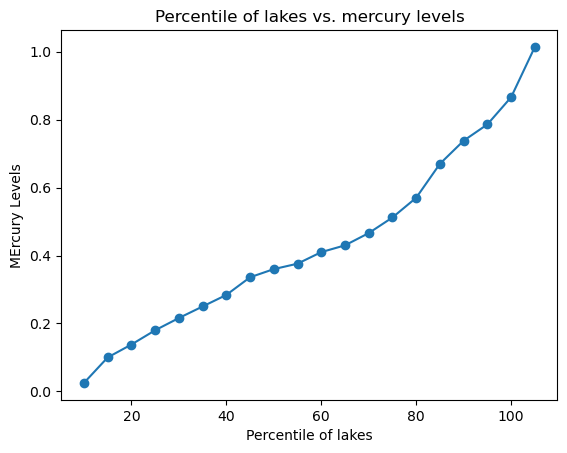

In [53]:

# Calculate the percentiles of the mercury levels
mercury_percentiles = np.arange(0, 100, 5)
mercury_percentile_values = np.percentile(df['Hg'], mercury_percentiles)

# Calculate the corresponding percentiles of the number of lakes
num_lakes_percentiles = np.arange(10, 110, 5)

# Plot the percentiles
plt.plot(num_lakes_percentiles, mercury_percentile_values, 'o-')

# Add axis labels and title
plt.xlabel('Percentile of lakes')
plt.ylabel('MErcury Levels')
plt.title('Percentile of lakes vs. mercury levels')

# Show the plot
plt.show()

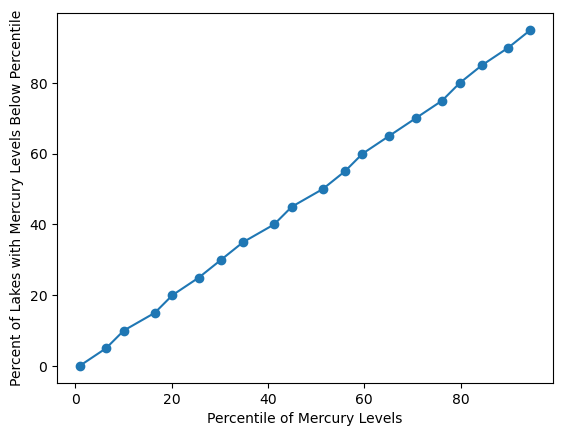

In [51]:
# Sample data
mercury_levels = df.Hg

# Calculate the percentiles of the mercury levels
percentiles = np.arange(0, 100, 5)
mercury_percentiles = np.percentile(mercury_levels, percentiles)

# Calculate the percentage of lakes with mercury levels less than or equal to each percentile
lake_percentages = []
for percentile in mercury_percentiles:
    lakes_below_percentile = sum(1 for level in mercury_levels if level <= percentile)
    percentage = lakes_below_percentile / len(mercury_levels) * 100
    lake_percentages.append(percentage)

# Plot the line graph
plt.plot(lake_percentages, percentiles,  marker='o')
plt.xlabel('Percentile of Mercury Levels')
plt.ylabel('Percent of Lakes with Mercury Levels Below Percentile')
plt.show()

In [92]:
len(df2)

108

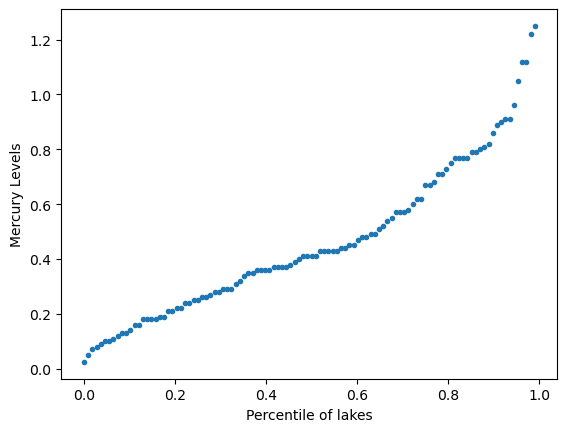

In [63]:
df2 = df.sort_values(by='Hg')

# dropping the outlier
df2 = df2[:-1]
# Calculate the cumulative frequency distribution
mercury_levels = df2['Hg']
cumulative_freq = np.arange(len(df2))/float(len(df2))

# Plot the cumulative frequency distribution
plt.plot(cumulative_freq, mercury_levels, marker='.', linestyle='none')
plt.xlabel('Percentile of lakes')
plt.ylabel('Mercury Levels')
plt.show()

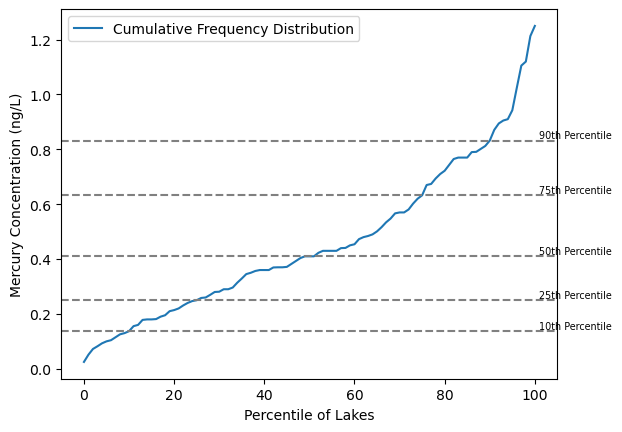

In [94]:
mercury_percentiles = np.arange(0, 101, 1)

# Calculate the corresponding percentiles of the number of lakes
num_lakes_percentiles = [np.percentile(df2['Hg'], percentile) for percentile in mercury_percentiles]

# Plot the percentiles
plt.plot(mercury_percentiles, num_lakes_percentiles, label='Cumulative Frequency Distribution')

# Add percentile lines
percentiles = [10, 25, 50, 75, 90]
for percentile in percentiles:
    value = np.percentile(df2['Hg'], percentile)
    plt.axhline(y=value, color='gray', linestyle='--')
    plt.text(1.01*max(mercury_percentiles), value, '{}th Percentile'.format(percentile, value), va='bottom', fontsize = 'x-small')

# Set axis labels and legend
plt.xlabel('Percentile of Lakes')
plt.ylabel('Mercury Concentration (ng/L)')
plt.legend()

# Show the plot
plt.show()

In [74]:
df.head(10)

,Name,Hg,N,ELV,SA,Z,LT,ST,DA,RF,FR,DAM,LAT1,LAT2,LAT3,LONG1,LONG2,LONG3,lat,long
0,ALLIGATOR.P,0.025,2,1494,47,26,2,0,1,0.69,0.8,1,45,37,50,69,12,30,"45°37'50""N","69°12'30""W"
1,ANASAGUNTICOOK.L,0.570,5,402,568,54,2,1,15,0.56,1.1,0,44,25,13,70,19,22,"44°25'13""N","70°19'22""W"
2,BALCH&STUMP.PONDS,0.770,5,557,704,44,2,1,14,0.58,2.7,0,43,37,0,70,59,4,"43°37'0""N","70°59'4""W"
3,BASKAHEGAN.L,0.790,5,417,6944,22,2,0,123,0.57,2.0,1,45,30,32,67,50,2,"45°30'32""N","67°50'2""W"
4,BAUNEAG.BEG.L,0.750,4,205,200,29,2,1,18,0.51,9.6,0,43,21,46,70,44,23,"43°21'46""N","70°44'23""W"
5,BEAVER.P,0.270,5,397,128,8,3,0,2,0.61,7.9,1,43,59,47,70,49,26,"43°59'47""N","70°49'26""W"
6,BEN.ANNIS.P,0.180,5,122,25,9,2,0,10,0.51,58.8,1,44,46,25,68,56,35,"44°46'25""N","68°56'35""W"
7,BOTTLE.L,1.050,5,298,281,42,2,1,8,0.48,2.1,1,45,18,36,68,3,17,"45°18'36""N","68°3'17""W"
8,BRACKETT.L,0.310,5,446,576,25,2,0,7,0.56,1.1,1,45,44,44,67,51,34,"45°44'44""N","67°51'34""W"
9,BRADBURY(BARKER).L,0.810,2,449,38,45,1,1,17,0.51,24.5,1,46,8,10,68,0,31,"46°8'10""N","68°0'31""W"


In [75]:
df.to_excel('Lakes_Geo.xlsx')

In [82]:
df['Latitude'] = df['LAT1'] + df['LAT2']/60 + df['LAT3']/3600
df['Longitude'] = -(df['LONG1'] + df['LONG2']/60 + df['LONG3']/3600)

# Define the thresholds for mercury levels
low_threshold = 0.5
high_threshold = 1.0

# Create a map centered at Maine
m = folium.Map(location=[45.25, -69.00], zoom_start=6)

# Add markers for each lake
for index, row in df.iterrows():
    # Determine the marker color based on mercury level
    if row['Hg'] < low_threshold:
        color = 'green'
    elif row['Hg'] < high_threshold:
        color = 'orange'
    else:
        color = 'red'
    
    # Add the marker to the map
    folium.Marker(location=[row['Latitude'], row['Longitude']], 
                  popup=row['Name'],
                  icon=folium.Icon(color=color),
                  icon_size = (0.1,0.1)).add_to(m),
                  

# Display the map
m

In [93]:
df2.to_excel('final_data.xlsx')